In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 7 

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
# Convert to millions of dollars for readability
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross (Adjusted)')/1000000,3))
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


In [8]:
top_movies.num_rows

200

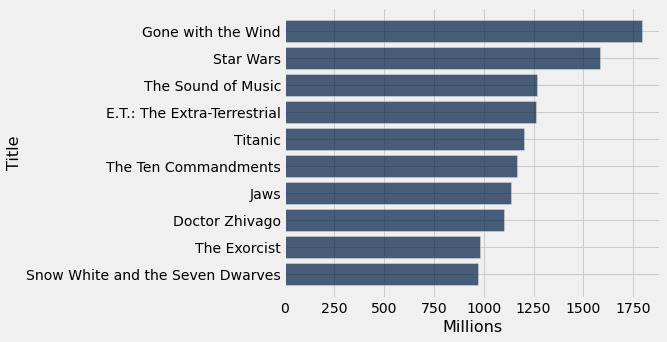

In [4]:
top_movies.take(np.arange(10)).barh('Title', 'Millions')

In [5]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [6]:
studio_distribution = studios.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [7]:
sum(studio_distribution.column('count'))

200

## Bar Charts ##

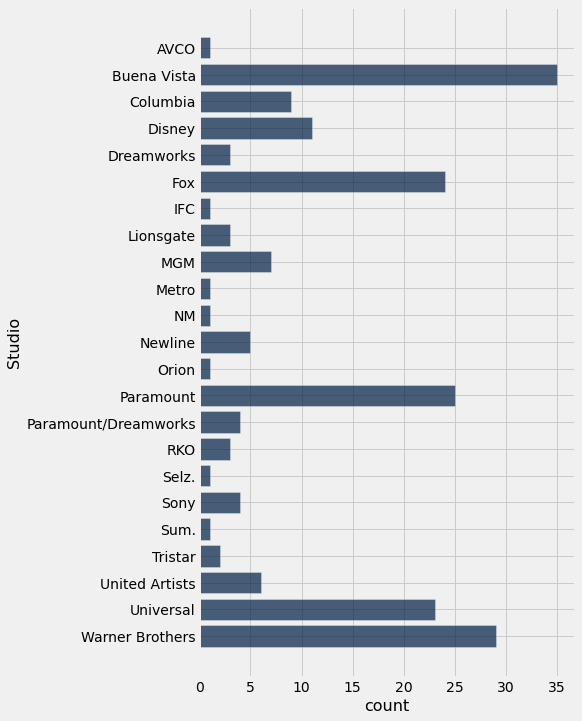

In [9]:
studio_distribution.barh('Studio')

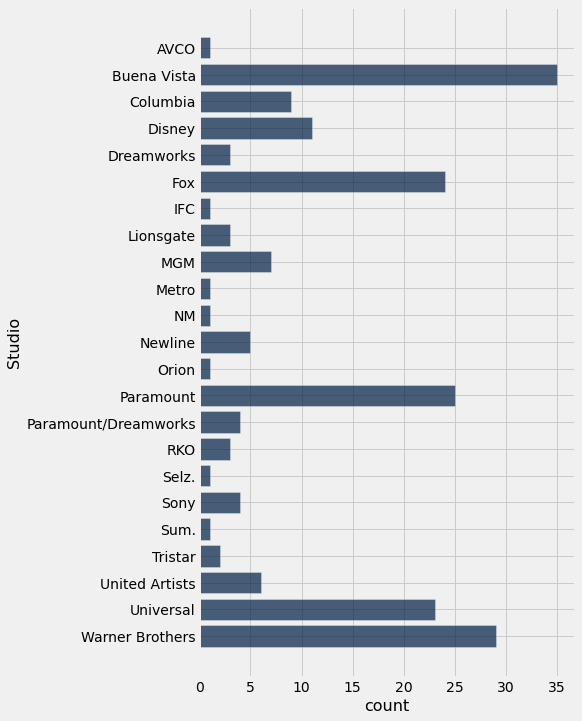

In [10]:
studio_distribution.barh('Studio','count')

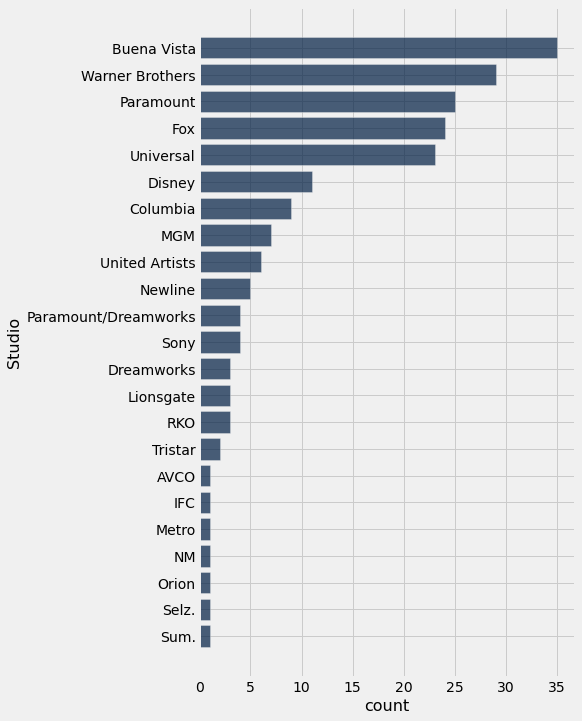

In [11]:
studio_distribution.sort('count', descending=True).barh('Studio')

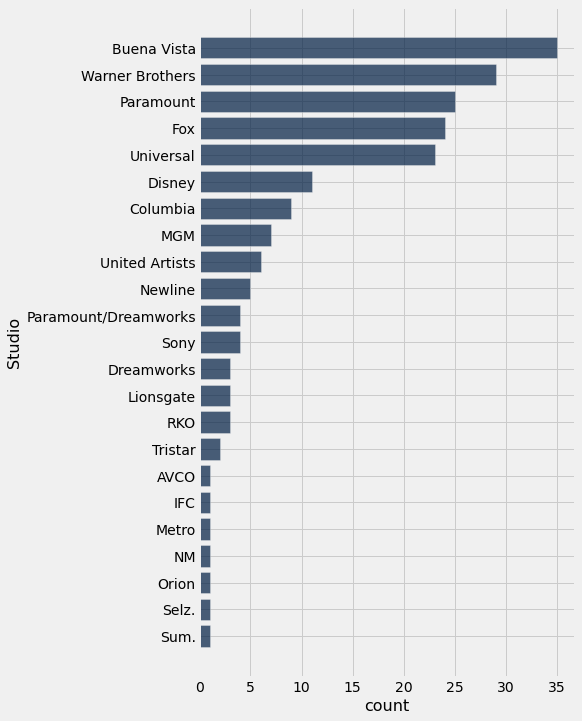

In [11]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [12]:
 top_movies.column('Year')

array([1939, 1977, 1965, 1982, 1997, 1956, 1975, 1965, 1973, 1937, 2015,
       1961, 1980, 1959, 2009, 1983, 1993, 1999, 1994, 1973, 1981, 1967,
       1941, 2015, 1972, 1994, 1964, 1978, 2012, 1965, 2008, 1967, 1959,
       1984, 2004, 1969, 1970, 2002, 1996, 1990, 1940, 1963, 1984, 1964,
       1970, 1973, 1953, 2006, 1956, 1942, 1974, 1989, 1945, 2003, 2003,
       1974, 2016, 1950, 2004, 1952, 1964, 1978, 2004, 2005, 1985, 2002,
       2012, 1999, 1978, 1982, 1977, 2017, 2016, 1961, 2001, 1955, 1977,
       1962, 1975, 1976, 1946, 1972, 2001, 1996, 1997, 1957, 2009, 1963,
       1960, 1975, 1970, 1984, 2015, 2002, 1993, 1992, 2010, 1990, 2013,
       1946, 2012, 2003, 1953, 1954, 1997, 1989, 2001, 2013, 2007, 2013,
       1991, 1941, 2000, 1986, 2011, 1999, 2001, 2007, 2013, 2016, 2003,
       2007, 1986, 1921, 1998, 2017, 1974, 1953, 1984, 1991, 2005, 2005,
       2007, 2002, 1993, 1954, 2008, 2011, 2004, 2008, 1995, 2017, 1990,
       1982, 1968, 1988, 2016, 1967, 2015, 2014, 19

In [13]:
2021 - top_movies.column('Year')

array([ 82,  44,  56,  39,  24,  65,  46,  56,  48,  84,   6,  60,  41,
        62,  12,  38,  28,  22,  27,  48,  40,  54,  80,   6,  49,  27,
        57,  43,   9,  56,  13,  54,  62,  37,  17,  52,  51,  19,  25,
        31,  81,  58,  37,  57,  51,  48,  68,  15,  65,  79,  47,  32,
        76,  18,  18,  47,   5,  71,  17,  69,  57,  43,  17,  16,  36,
        19,   9,  22,  43,  39,  44,   4,   5,  60,  20,  66,  44,  59,
        46,  45,  75,  49,  20,  25,  24,  64,  12,  58,  61,  46,  51,
        37,   6,  19,  28,  29,  11,  31,   8,  75,   9,  18,  68,  67,
        24,  32,  20,   8,  14,   8,  30,  80,  21,  35,  10,  22,  20,
        14,   8,   5,  18,  14,  35, 100,  23,   4,  47,  68,  37,  30,
        16,  16,  14,  19,  28,  67,  13,  10,  17,  13,  26,   4,  31,
        39,  53,  33,   5,  54,   6,   7,  42,  23,  61,  39,  14,  36,
        26,   5,  31,  47,  11,  17,  21,  29,   5,  34,  19,   7,   6,
        25,   7,   6,  44,  40,  22,  12,  18,  17,  53,  21,  2

In [14]:
ages = 2021 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [15]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18,82
Star Wars,Fox,460998007,1583483200,1977,1583.48,44
The Sound of Music,Fox,158671368,1266072700,1965,1266.07,56
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09,39
Titanic,Paramount,658672302,1204368000,1997,1204.37,24
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59,65
Jaws,Universal,260000000,1138620700,1975,1138.62,46
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56,56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227,48
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01,84


## Binning and Histograms

In [16]:
min(ages), max(ages)

(4, 100)

In [17]:
np.arange(0, 101, 25)

array([  0,  25,  50,  75, 100])

In [23]:
top_movies_bin_data = top_movies.bin('Age', bins = np.arange(0, 126, 25))
top_movies_bin_data

bin,Age count
0,85
25,69
50,36
75,9
100,1
125,0


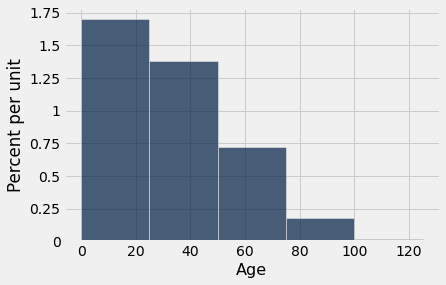

In [27]:
top_movies.hist('Age', bins=np.arange(0, 126, 25))  # bins 25 apart

In [33]:
1.7*25


42.5

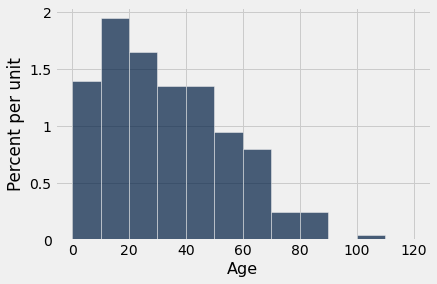

In [28]:
top_movies.hist('Age', bins=np.arange(0, 126, 10))  # bins 10 apart

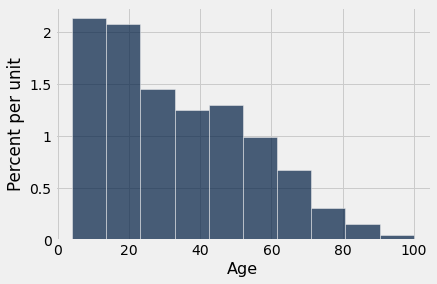

In [29]:
top_movies.hist('Age')  # bins not specified; let Python decide

In [30]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [31]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,3
5,25
10,18
15,39
25,42
40,53
65,20
100,0


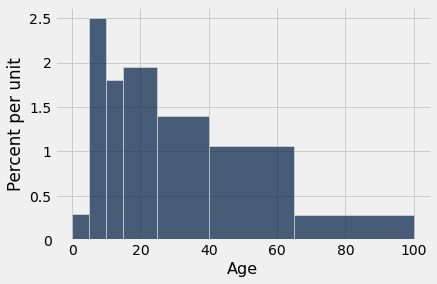

In [32]:
top_movies.hist('Age', bins=my_bins)  # uneven bins

In [22]:
sum(top_movies_bin_data.column('Age count'))

200

In [ ]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))

In [ ]:
top_movies.where('Age', 50)

In [ ]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [ ]:
binned_data